<a href="https://colab.research.google.com/github/hidemet/mldm-credit-card-risk/blob/main/myCopy_ProgettoMLDM_Dumas_Rossini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

## 1.2 Dataset Description
Il dataset è composto da 1000 samples, 20 features e 1 target. Il target è binario e rappresenta la presenza o meno di un rischio di credito. Le feature rappresentano variabili demografiche, economiche, finanziarie dei clienti.

In [4]:
# Load data
names = [
    "Account_balance", # 1 Saldo contabile (diviso in quattro fasce)
    "Duration", # 2 (month)
    "Credit_history", # 3
    "Purpose", # 4
    "Credit_amount", # 5
    "Saving_accounts", # 6
    "Employment_length",# 7
    "Installment_rate", # 8 (% sul reddito disponibile)
    "Sex_and_Marital_status", # 9 
    "Guarantor", # 10
    "Residence_duration", # 11
    "Most_valuable_asset", # 12
    "Age", # 13
    "Concurrent_credits", # 14
    "Type_apartment", # 15
    "Existing_credits_count", # 16
    "Job", # 17
    "Dependents_count", # 18
    "Telephone", # 19
    "Foreign_worker", # 20
    "Credit_risk"  # target
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
data = pd.read_csv(url, sep=" ", header=None, names=names)
data

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [5]:
categorical_cols = [
    "Account_balance",
    "Credit_history",
    "Purpose",
    "Saving_accounts",
    "Employment_length",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset",
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_worker"
]

# Variabili numeriche (quantitative)
numerical_cols = [
    "Duration",
    "Credit_amount",
    "Installment_rate",
    "Residence_duration",
    "Age",
    "Existing_credits_count",
    "Dependents_count"
]


In [6]:
# Verifica che non ci siano valori negativi nelle colonne numeriche
for col in numerical_cols:
    if (data[col] < 0).any():
        print(f"Attenzione: La colonna {col} contiene valori negativi.")

# Verifica che le colonne categoriche contengano solo i valori attesi
expected_values = {
    "Account_balance": ['A11', 'A12', 'A13', 'A14'],
    "Credit_history": ['A30', 'A31', 'A32', 'A33', 'A34'],
    "Purpose": ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410'],
    "Saving_accounts": ['A61', 'A62', 'A63', 'A64', 'A65'],
    "Employment_length": ['A71', 'A72', 'A73', 'A74', 'A75'],
    "Sex_and_Marital_status": ['A91', 'A92', 'A93', 'A94'],
    "Guarantor": ['A101', 'A102', 'A103'],
    "Most_valuable_asset": ['A121', 'A122', 'A123', 'A124'],
    "Concurrent_credits": ['A141', 'A142', 'A143'],
    "Type_apartment": ['A151', 'A152', 'A153'],
    "Job": ['A171', 'A172', 'A173', 'A174'],
    "Telephone": ['A191', 'A192'],
    "Foreign_worker": ['A201', 'A202']
}

for col, valid_values in expected_values.items():
    if not data[col].isin(valid_values).all():
        print(f"Attenzione: La colonna {col} contiene valori non validi.")

# Verifica che non ci siano valori mancanti
missing_values = data.isnull().sum()
if missing_values.any():
    print("Attenzione: Ci sono valori mancanti nelle seguenti colonne:")
    print(missing_values[missing_values > 0])
else:
    print("Non ci sono valori mancanti nel dataset.")

Non ci sono valori mancanti nel dataset.


In [7]:
# Mappatura dei codici con etichette descrittive
label_mapping = {
    "Account_balance": {'A11': 'low', 'A12': 'medium', 'A13': 'high', 'A14': 'no account'},
    "Credit_history": {'A30': 'no credits', 'A31': 'all credits paid', 'A32': 'existing credits paid', 'A33': 'delay in past', 'A34': 'critical account'},
    "Purpose": {'A40': 'car', 'A41': 'furniture/equipment', 'A42': 'radio/TV', 'A43': 'domestic appliances', 'A44': 'repairs', 'A45': 'education', 'A46': 'vacation', 'A47': 'retraining', 'A48': 'business', 'A49': 'others', 'A410': 'others'},
    "Saving_accounts": {'A61': 'little', 'A62': 'moderate', 'A63': 'quite rich', 'A64': 'rich', 'A65': 'no savings account'},
    "Employment_length": {'A71': 'unemployed', 'A72': '< 1 year', 'A73': '1 - 4 years', 'A74': '4 - 7 years', 'A75': '>= 7 years'},
    "Sex_and_Marital_status": {'A91': 'male divorced/separated', 'A92': 'female divorced/separated/married', 'A93': 'male single', 'A94': 'male married/widowed'},
    "Guarantor": {'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'},
    "Most_valuable_asset": {'A121': 'real estate', 'A122': 'life insurance', 'A123': 'car', 'A124': 'no property'},
    "Concurrent_credits": {'A141': 'none', 'A142': 'bank', 'A143': 'stores'},
    "Type_apartment": {'A151': 'own', 'A152': 'for free', 'A153': 'rent'},
    "Job": {'A171': 'unemployed/unskilled - non-resident', 'A172': 'unskilled - resident', 'A173': 'skilled employee/official', 'A174': 'management/self-employed/highly qualified employee'},
    "Telephone": {'A191': 'none', 'A192': 'yes'},
    "Foreign_worker": {'A201': 'yes', 'A202': 'no'},
    "Credit_risk": {1: 'good', 2: 'bad'}
}

data_mapped = data.copy()
for column, mapping in label_mapping.items():
    if column in data_mapped.columns:
        data_mapped[column] = data_mapped[column].map(mapping)

data = data_mapped

data.head(10)

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,low,6,critical account,domestic appliances,1169,no savings account,>= 7 years,4,male single,none,...,real estate,67,stores,for free,2,skilled employee/official,1,yes,yes,good
1,medium,48,existing credits paid,domestic appliances,5951,little,1 - 4 years,2,female divorced/separated/married,none,...,real estate,22,stores,for free,1,skilled employee/official,1,none,yes,bad
2,no account,12,critical account,vacation,2096,little,4 - 7 years,2,male single,none,...,real estate,49,stores,for free,1,unskilled - resident,2,none,yes,good
3,low,42,existing credits paid,radio/TV,7882,little,4 - 7 years,2,male single,guarantor,...,life insurance,45,stores,rent,1,skilled employee/official,2,none,yes,good
4,low,24,delay in past,car,4870,little,1 - 4 years,3,male single,none,...,no property,53,stores,rent,2,skilled employee/official,2,none,yes,bad
5,no account,36,existing credits paid,vacation,9055,no savings account,1 - 4 years,2,male single,none,...,no property,35,stores,rent,1,unskilled - resident,2,yes,yes,good
6,no account,24,existing credits paid,radio/TV,2835,quite rich,>= 7 years,3,male single,none,...,life insurance,53,stores,for free,1,skilled employee/official,1,none,yes,good
7,medium,36,existing credits paid,furniture/equipment,6948,little,1 - 4 years,2,male single,none,...,car,35,stores,own,1,management/self-employed/highly qualified empl...,1,yes,yes,good
8,no account,12,existing credits paid,domestic appliances,3059,rich,4 - 7 years,2,male divorced/separated,none,...,real estate,61,stores,for free,1,unskilled - resident,1,none,yes,good
9,medium,30,critical account,car,5234,little,unemployed,4,male married/widowed,none,...,car,28,stores,for free,2,management/self-employed/highly qualified empl...,1,none,yes,bad


## 2. Esplorazione e Preparazione dei Dati

### 2.1 Data Splitting

In [8]:
X = data.drop('Credit_risk', axis=1)
y = data['Credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)  # Dovrebbe essere (800, 20)
print("X_test shape:", X_test.shape)   # Dovrebbe essere (200, 20)
print("y_train shape:", y_train.shape)   # Dovrebbe essere (800,)
print("y_test shape:", y_test.shape)    # Dovrebbe essere (200,)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


### 2.2 EDA - Exploratory Data Analysis (Training Set)

> Questa fase ci aiuta ad identificare eventuali anomalie nei dati, come valori nulli o outliers, e a comprendere meglio la distribuzione delle variabili.

#### 2.2.1 Calcolo di statistiche descrittive

In [9]:
# Descrizione statistica per feature numeriche
X_train.describe()

,Duration,Credit_amount,Installment_rate,Residence_duration,Age,Existing_credits_count,Dependents_count
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
# Per feature categoriali, contiamo il numero di occorrenza di ogni valore.
X_train.value_counts

<bound method DataFrame.value_counts of     Account_balance  Duration         Credit_history              Purpose  \
29              low        60          delay in past               others   
535            high        21       critical account             vacation   
695      no account         6  existing credits paid  furniture/equipment   
557      no account        21             no credits                  car   
836      no account        12  existing credits paid  domestic appliances   
..              ...       ...                    ...                  ...   
106      no account        18       all credits paid                  car   
270      no account        18  existing credits paid                  car   
860      no account        24       critical account  furniture/equipment   
435          medium        12  existing credits paid  domestic appliances   
102      no account         6          delay in past  domestic appliances   

     Credit_amount     Saving_accou

#TODO mettere la parte sulla correlazione

#### 2.2.2 Data Visualization

##### Features numeriche

Istogrammi, boxplot, scatter plot, grafici a barre.

Analizziamo le variabili numeriche:
**Duration**
- Istogramma:
  - Asimmetria positiva (skewness a destra).
  - I crediti "bad" tendono ad avere durate più lunghe.
- Distribuzione normalizzata:
  - Conferma l'ipotesi di asimmetria positiva.
  - Distribuzione dei crediti "bad" è più concentrata a destra rispetto a quella dei crediti "good".
- Boxplot:
  - Mediana più alta per i crediti "bad".
- **Interventi suggeriti**
  - Trasformazione logaritmica per ridurre l'asimmetria. `np.log(data['Duration'] + 1)` (aggiungere 1 per evitare log(0)). In questo modo, la distribuzione diventa più simile a una normale e si riduce l'impatto degli outliers.
  - Gestione degli outlier: Dopo la trasformazione logaritmica, valutiamo se ci sono ancora outlier "estremi" che potrebbero influenzare negativamente il modello. Potremmo decidere di rimuoverli o di trattarli in modo diverso. Se ci sono, possiamo winsorizzare i valori oltre il 95° percentile (ma va fatto con estrema cautela, perché potremmo perdere informazioni importanti) oppure usare un modello robusto agli outlier. (es. Random Forest, Gradient Boosting).
  - Binning: Potremmo considerare di suddividere la "Duration" in fasce.
**Credit_amount**
- Istogramma:
  - Forte asimmetria positiva (skewness a destra).
  - Distribuzione leggermente diversa tra le due classi target. I crediti "bad" tendono ad avere importi *leggermente* più alti, ma c'è molta sovrapposizione
- Distribuzione normalizzata:
  - Conferma l'ipotesi di asimmetria positiva.
  - Distribuzione dei crediti "bad" è più concentrata a destra rispetto a quella dei crediti "good".
- Boxplot:
  - Mostra la presenza di outliers in entrambe le classi.
  - La mediana è lievemente più alta per i crediti "bad".
  - I box sono abbastanza sovrapposti, indicando che la variabile, da sola, potrebbe non essere un fortissimo predittore.
- **Interventi suggeriti**
  - Trasformazione logaritmica per ridurre l'asimmetria. `np.log(data['Credit_amount'] + 1)` (aggiungere 1 per evitare log(0)). In questo modo, la distribuzione diventa più simile a una normale e si riduce l'impatto degli outliers.
  - Gestione degli outlier: Dopo la trasformazione logaritmica, valutiamo se ci sono ancora outlier "estremi" che potrebbero influenzare negativamente il modello. Potremmo decidere di rimuoverli o di trattarli in modo diverso. Se ci sono, possiamo winsorizzare i valori oltre il 95° percentile (ma va fatto con estrema cautela, perché potremmo perdere informazioni importanti) oppure usare un modello robusto agli outlier. (es. Random Forest, Gradient Boosting).
  - Binning: Potremmo considerare di raggruppare i valori in bin (es. 0-1000, 1001-2000, ecc.) o (es. "basso", "medio","alto") per ridurre l'impatto degli outlier e rendere la variabile più interpretabile. Questo potrebbe aiutare il modello a catturare relazioni non lineari.

- **Residence_duration**
  - Istogramma e boxplot: Molto simili a "Installment_rate". Distribuzioni simili tra le due classi.
 - **Interventi suggeriti:**
    *   **Trattamento come variabile categorica:** Considera one-hot encoding.
    *   **Non fare nulla:** Potrebbe non essere una variabile molto informativa.


**Age**
  *   **Istogramma:**
    *   Leggera asimmetria positiva (più persone giovani).
    *   I "bad" risk sembrano essere, in media, *leggermente* più giovani.
*   **Distribuzione Normalizzata:**
    *   Conferma la leggera differenza nelle distribuzioni.
*   **Boxplot:**
    *   Mediana leggermente più bassa per i "bad" risk.
    *   Presenza di outlier (soprattutto per i "good" risk).

*   **Interventi suggeriti:**
    *   **Standardizzazione/Normalizzazione:** Applica una di queste tecniche (es. `StandardScaler`).
    *   **Valuta gli outlier:**  Sono errori? Hanno un significato? Potresti provare a winsorizzare, ma con cautela.
    *   **Binning:** Potresti creare fasce d'età (es. "giovani", "adulti", "anziani").

**Existing_credits_count**
*   **Istogramma:**
    *   La maggior parte delle persone ha 1 o 2 crediti esistenti.
    *   Distribuzioni simili tra "good" e "bad" risk.
* **Distribuzione Normalizzata e Boxplot:** confermano.
*   **Interventi suggeriti:**
    *   **Trattamento come variabile categorica:** Valuta one-hot encoding.
    *   **Non fare nulla:** Potrebbe non essere molto informativa.
    *   **Creazione di feature:** Potresti combinare questa variabile con altre (es. "Credit_amount") per creare nuove feature.
  
**Dependents_count**
*   **Istogramma:**
    *   La grande maggioranza ha 1 dipendente.
    *   Distribuzioni molto simili tra "good" e "bad" risk.
* **Distribuzione Normalizzata e boxplot:** confermano
*   **Interventi suggeriti:**
    *   **Non fare nulla:** Probabilmente non è una variabile molto utile.
    *   **Considera di rimuoverla:** Per semplificare il modello.

Analizziamo ora le variabili categoriche:
**1. Account_balance (Saldo Contabile)**
*   **Countplot:**
    *   La categoria "no account" (nessun conto corrente) è molto più frequente tra i "bad" risk.
    *   "low" è più frequente dei "good", ma non in modo drammatico.
    *    "medium" e "high" sono meno frequenti in generale, ma sembrano *leggermente* più comuni tra i "good".
*   **Distribuzione Normalizzata:**
    *   Conferma quanto detto sopra: avere "no account" è un forte indicatore di "bad" risk.

*   **Interpretazione e Azioni:**
    *   Questa variabile sembra *molto* informativa.  La presenza o assenza di un conto, e il suo saldo, sono chiaramente correlati al rischio di credito.
    *   Mantieni questa variabile.
    *   Assicurati che il modello possa catturare bene le relazioni tra questa variabile e il target (one-hot encoding è appropriato).

**2. Credit_history (Storia Creditizia)**

*   **Countplot:**
    *   "existing credits paid" (crediti esistenti pagati regolarmente) è la categoria più comune per entrambi i gruppi, ma *molto* più per i "good".
    *   "critical account" (conti problematici) e "delay in past" (ritardi nei pagamenti) sono più comuni tra i "bad".
    * "no credits" e' piu' comune nei "bad"
*   **Distribuzione Normalizzata:**
    *   Conferma che una storia creditizia problematica (o assente) è un forte indicatore di "bad" risk.

*   **Interpretazione e Azioni:**
    *   Variabile *molto* informativa.
    *   Mantieni questa variabile.
    *   One-hot encoding è appropriato.

**3. Purpose (Scopo del Credito)**

*   **Countplot:**
    *   "car" (auto) è il più comune, seguito da "radio/TV" e "furniture/equipment".
    *   "car" e "radio/TV" sono più frequenti tra i "good", "others" (per altre ragioni) e' piu' frequente tra i "bad"
*   **Distribuzione Normalizzata:**
    *   Ci sono alcune differenze nelle proporzioni, ma non sembrano *estremamente* marcate come per le prime due variabili.

*   **Interpretazione e Azioni:**
    *   Variabile potenzialmente utile, ma forse meno delle precedenti.
    *   Mantieni la variabile.
    *   One-hot encoding.
    *   Valuta se raggruppare alcune categorie meno frequenti (es. "vacation", "education", "repairs") in un'unica categoria "other".

**4. Employment_length (Durata dell'Impiego)**

*   **Countplot**
  *   "> = 7 years" e "1-4 years" sono le categorie piu' frequenti, ma non c'e' molta differenza tra good e bad risk.
  *  "unemployed" e "<1 year" sembrano invece piu' frequenti tra i "bad" borrowers.
*   **Distribuzione Normalizzata:**
    *   Evidenzia meglio quanto detto sopra.

*   **Interpretazione e Azioni:**
    *   La variabile *potrebbe* essere utile, ma la relazione con il rischio di credito non è fortissima.
    *   Mantieni la variabile.
    *   One-hot encoding.

**5. Sex_and_Marital_status (Sesso e Stato Civile)**

*  **Countplot**
  * "male single" e' il gruppo nettamente piu' numeroso.
  *  "female divorced/separated/married" sembra piu' rischioso.
* **Distribuzione Normalizzata:**
    *   Evidenzia meglio quanto detto sopra.

*   **Interpretazione e Azioni:**
    *   La variabile *potrebbe* essere utile, ma fai *molta attenzione* a questioni etiche e di *fairness*.  Discriminare in base al sesso o allo stato civile è illegale e immorale.  Valuta attentamente se usare questa variabile, e se lo fai, assicurati che il modello non perpetui bias ingiusti.
    *   Se decidi di usarla, one-hot encoding.

**6. Saving_accounts (Conti di Risparmio)**

*    **Countplot:**
     * "little" (poco risparmio) è la categoria più comune, e molto più frequente tra i "bad".
     *  "no saving account" e' un forte indicatore di rischio.
     * "quite rich" and "rich" sono poco frequenti, ma sembrano *leggermente* più comuni tra i "good".
*    **Distribuzione Normalizzata:**
     * Conferma l'importanza di questa variabile.

*   **Interpretazione e Azioni:**
    *   Variabile *molto* informativa.
    *   Mantieni questa variabile.
    *   One-hot encoding è appropriato.

**7. Guarantor**
* **Countplot**
  * La vasta maggioranza non ha garanti.
* **Distribuzione Normalizzata:**
      *   Non avere garanti ("none") e' piu' frequente tra i cattivi pagatori, ma non in modo molto significativo.

* **Interventi**:
  * Mantieni la variabile, ma one-hot encoding e valuta se rimuoverla in seguito se risulta poco informativa per il modello.

**8. Concurrent_credits**
* **Countplot**
     * La vasta maggioranza ha altri crediti in "stores".
* **Distribuzione Normalizzata:**
        *   Avere crediti in banca ("bank") e' piu' frequente tra i cattivi pagatori, ma non in modo molto significativo.

* **Interventi**:
  * Mantieni la variabile, ma one-hot encoding e valuta se rimuoverla in seguito se risulta poco informativa per il modello.

**9. Most_valuable_asset**

* **Countplot**
    *   "car" e "real estate" sembrano essere le categorie più comuni.
     *   "no property" e' piu' frequente tra i cattivi pagatori.
* **Distribuzione Normalizzata**
    * Evidenzia quanto detto sopra.

*  **Interventi**
      * Mantieni la variabile
      * One-hot encoding

**10. Type_apartment**
* **Countplot**
    *   "for free" e' piu' frequente tra i cattivi pagatori.
* **Distribuzione Normalizzata**
        *   Conferma.

* **Interventi**
    *   Mantieni, one-hot encoding.

**11. Job**

* **Countplot**
      * La vasta maggioranza sono "skilled employee/official"
      * "unemployed/unskilled - non-resident" sono piu' comuni tra i cattivi pagatori, anche se sono pochi in valore assoluto.
* **Distribuzione normalizzata**
        * Conferma
* **Interventi**
      * Mantieni, one-hot encoding, valuta se raggruppare alcune categorie

**12. Telephone**

*   **Countplot:**
    *   "none" è più comune in generale. Non sembra esserci una grande differenza tra "good" e "bad" risk.
*  **Distribuzione Normalizzata**
*   **Interpretazione e Azioni:**
    *   Variabile *probabilmente poco informativa*.
    *   Potresti considerare di *rimuoverla* per semplificare il modello.

**13. Foreign_worker**

*   **Countplot:**
    *   La stragrande maggioranza è "yes" (lavoratore straniero).
*     **Distribuzione Normalizzata**
   *   I "no" (non stranieri) hanno un rischio *leggermente* più alto, ma la differenza è minima.
*   **Interpretazione e Azioni:**
    *   Variabile *probabilmente poco informativa*.
    *   Potresti considerare di *rimuoverla*.

**Riepilogo e Prossimi Passi**

1.  **Variabili più promettenti:** `Account_balance`, `Credit_history`, `Saving_accounts` sembrano le più informative, seguite da `Purpose` e `Employment_length`.
2.  **Variabili potenzialmente problematiche:** `Sex_and_Marital_status` (per questioni etiche), `Telephone` e `Foreign_worker` (probabilmente poco informative).
3. **One-hot encoding:** Applica one-hot encoding a *tutte* le variabili categoriche.
4. **Feature scaling:** Dopo aver gestito le variabili categoriche, standardizza o normalizza *tutte* le variabili numeriche (incluse quelle create con one-hot encoding). Questo è *essenziale* per le reti neurali.


In [ ]:
def plot_feature_analysis(df, col, target_col):
    """
    Crea istogramma, distribuzione normalizzata e boxplot per una colonna,
    suddivisi per il valore del target.

    Args:
        df: DataFrame.
        col: Nome della colonna da analizzare.
        target_col: Nome della colonna target.
    """
    plt.figure(figsize=(18, 6))

    # Istogramma
    plt.subplot(1, 3, 1)
    if df[col].dtype == 'object':  # Se è categorica
      #Uso un countplot invece di un istogramma
      ax1 = sns.countplot(data=df, x=col, hue=target_col, palette=['#4c72b0','#dd8452'])
      plt.xticks(rotation=45, ha="right")  # Ruota le etichette per leggibilità
      countplot_categories_order = [t.get_text() for t in ax1.get_xticklabels()]
    else:
      sns.histplot(data=df, x=col, hue=target_col, kde=False) #kde=False per non avere la stima della densita'
    plt.title(f'Istogramma di {col}')

    # Distribuzione normalizzata
    plt.subplot(1, 3, 2)
    if df[col].dtype != 'object':
        plt.subplot(1, 3, 2)
        for label in df[target_col].unique():
            sns.kdeplot(df.loc[df[target_col] == label, col], label=label, fill=True) #fill=True riempe sotto la curva
        plt.title(f'Distribuzione Normalizzata di {col}')
        plt.legend()
    else:
      
        dist = df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0)
        dist = dist.reindex(countplot_categories_order)
        dist.plot(kind='bar', stacked=True,ax=plt.gca(), label=target_col, color=['#dd8452','#4c72b0'])
        plt.title(f'Distribuzione Normalizzata di {col}')
        plt.xticks(rotation=45, ha="right")
        plt.legend()
    
    # Boxplot (numeriche)
    if df[col].dtype != 'object':
        plt.subplot(1, 3, 3)
        sns.boxplot(x=target_col, y=col, data=df, hue=target_col, palette=['#c6dcec','#ffdec2'])
        plt.title(f'Boxplot di {col}')
       

    plt.tight_layout()
    plt.show()

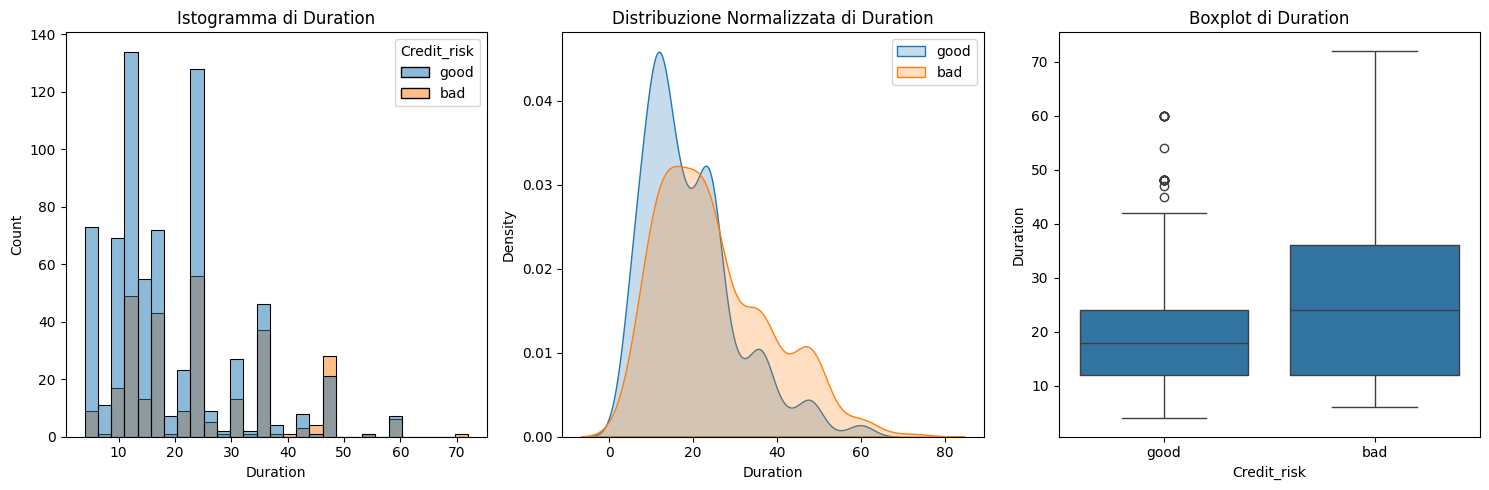

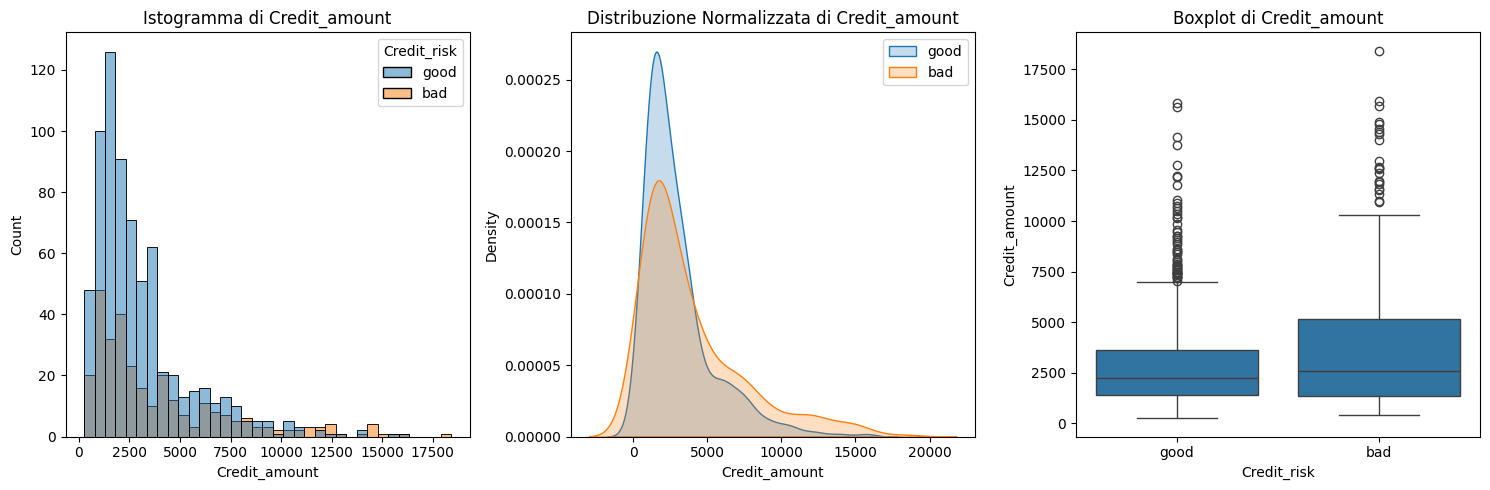

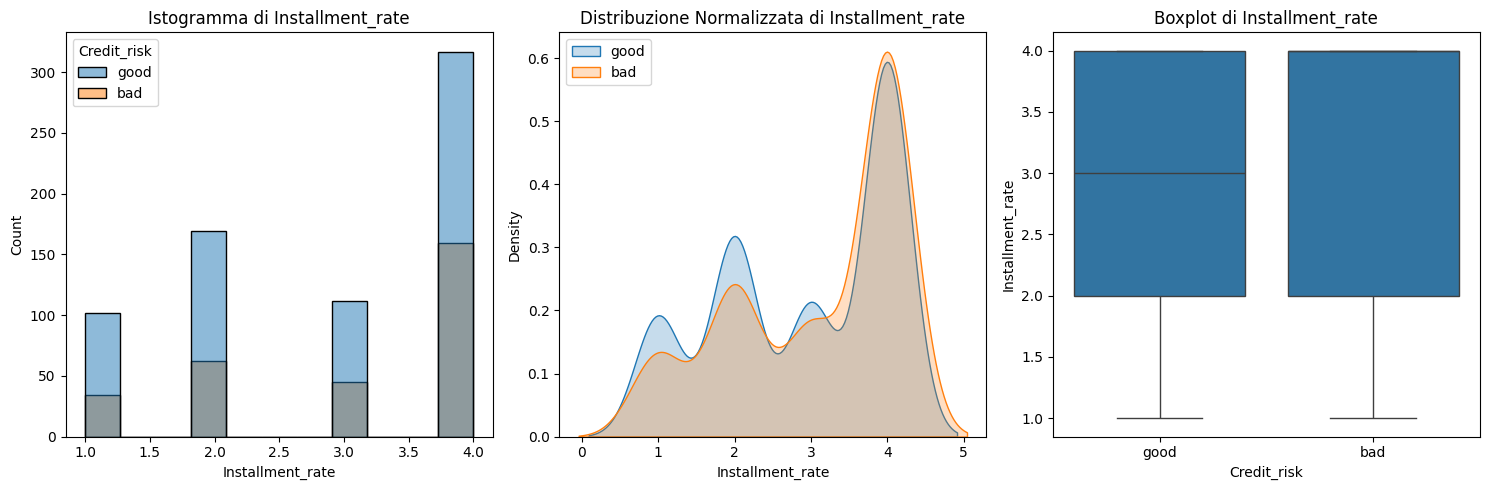

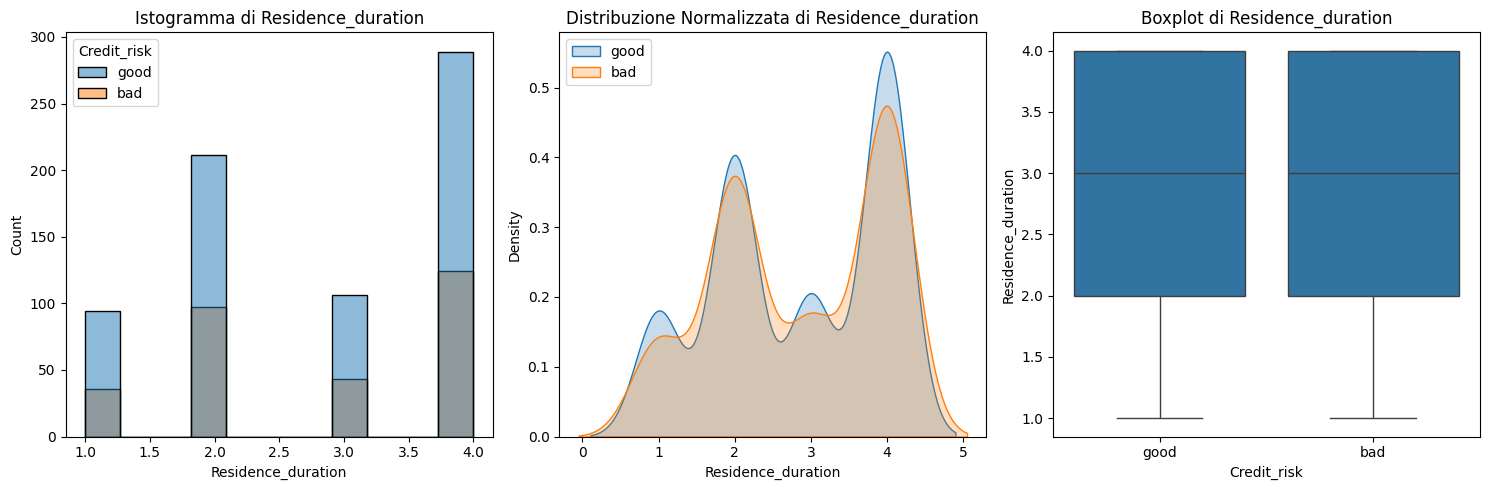

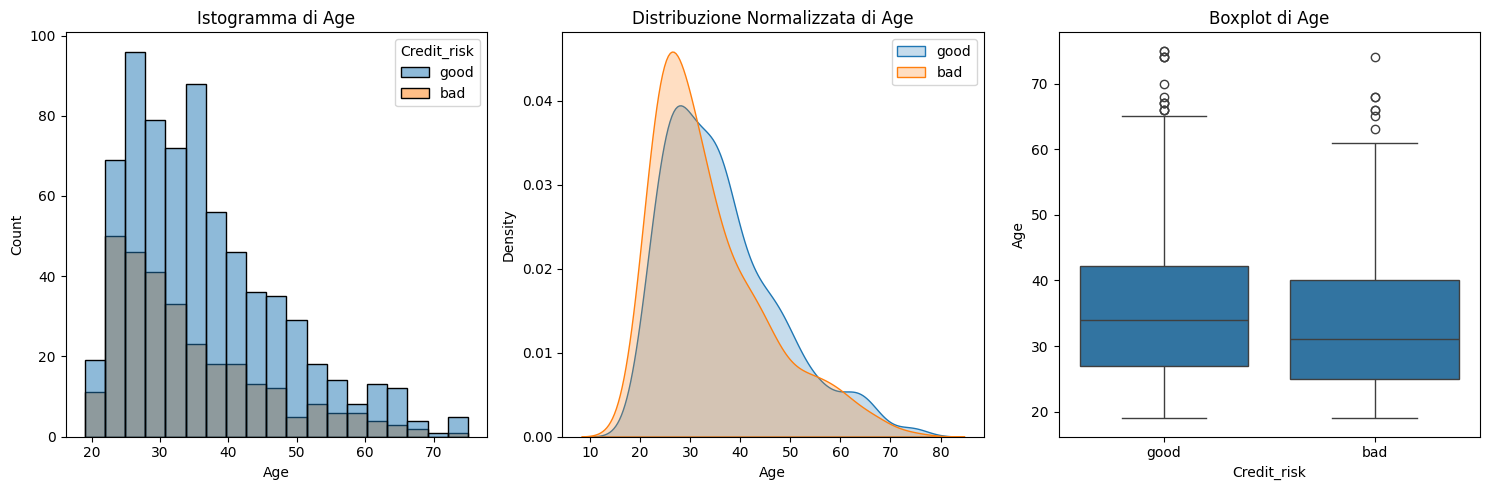

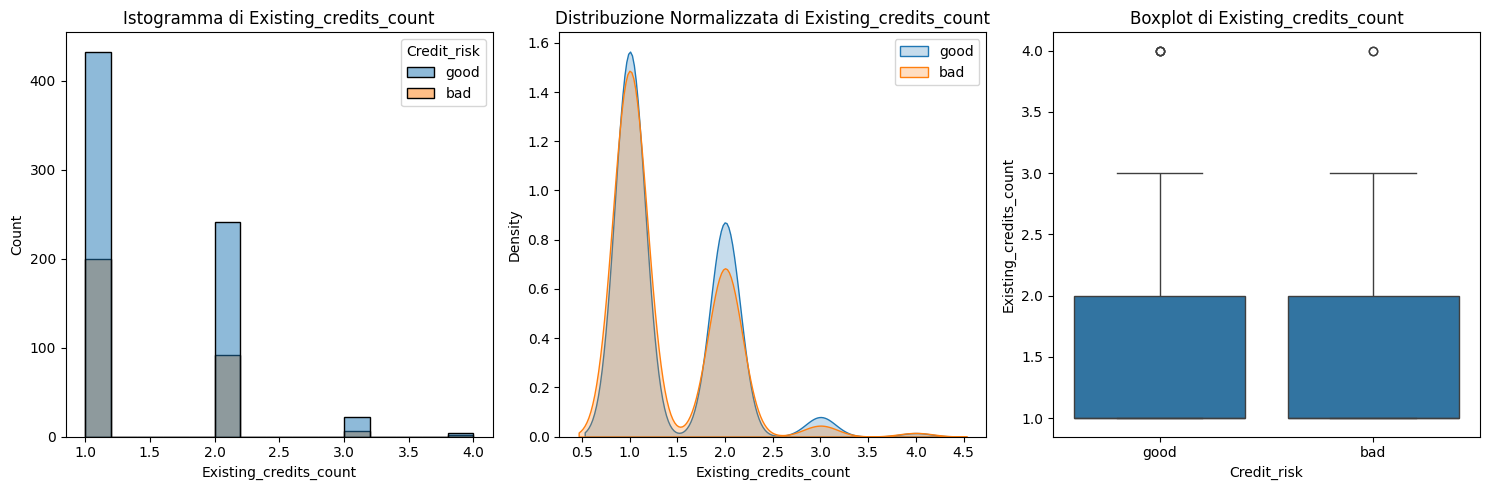

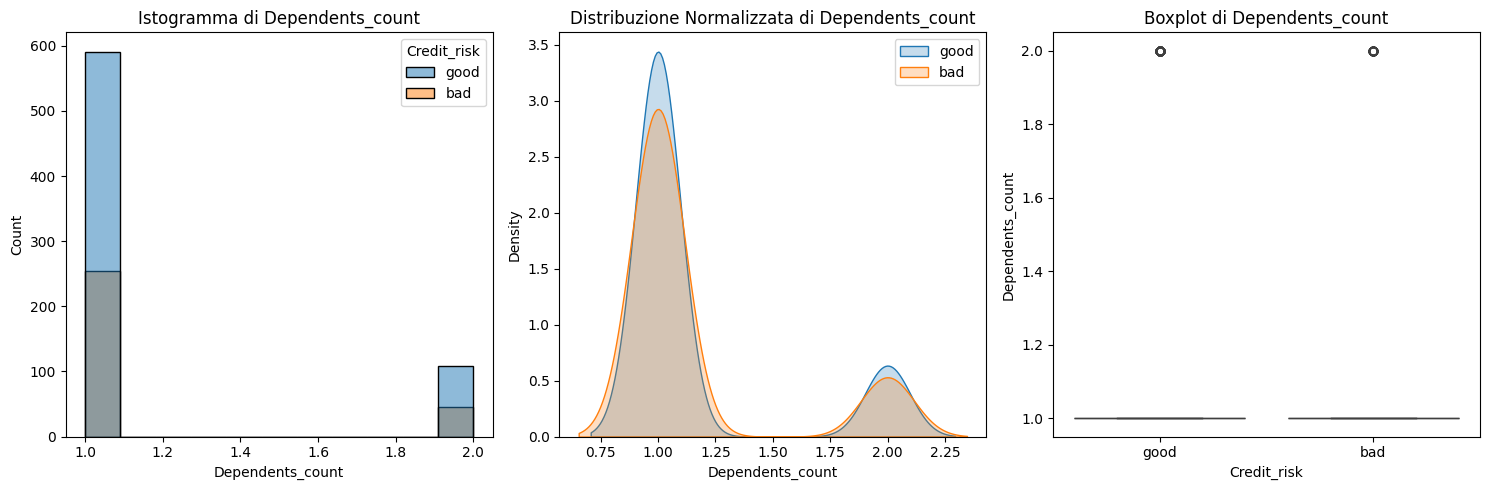

In [13]:
# Grafici per variabili numeriche
for col in numerical_cols:
    plot_feature_analysis(data, col, 'Credit_risk')

In [ ]:
# Grafici per variabili categoriche
for col in categorical_cols:
    plot_feature_analysis(data, col, 'Credit_risk')

NameError: name 'categorial_cols' is not defined

#### 2.2.3 Relazione tra le variabili

**Scatter Plot Matrix (Pair Plot):**

*   *Come:* L'abbiamo già visto, `sns.pairplot(df)`, ma è utile *ripeterlo* dopo aver fatto eventuali trasformazioni (es. logaritmo) e *prima* di standardizzare/normalizzare.  Se hai troppe variabili numeriche, seleziona solo quelle più promettenti o quelle che vuoi investigare ulteriormente.

*   *Cosa cercare:*
    *   **Relazioni non lineari:** Se vedi curve, "U", "V", o altre forme, la correlazione lineare (Pearson) non catturerà la relazione. Potresti aver bisogno di:
        *   Trasformare le variabili (es. log, sqrt, polinomiale).
        *   Creare *feature* di interazione (es. moltiplicare due variabili).
        *   Usare modelli non lineari (es. alberi decisionali, SVM, reti neurali).
    *   **Cluster:** Se vedi gruppi distinti di punti, potrebbe essere utile usare un algoritmo di clustering (es. K-Means) per creare una nuova variabile categorica che identifica questi gruppi.
    *   **Outlier bivariati:** Punti che sono outlier *rispetto alla relazione tra due variabili*, anche se non sono outlier per le singole variabili.
*   **Scatter Plot con Hue (per variabili categoriche):**
    *   *Come:*  Aggiungi l'argomento `hue='variabile_categorica'` a `sns.scatterplot()`.
    *   *Cosa cercare:* Come la relazione tra due variabili numeriche cambia al variare della categoria.  Questo può rivelare interazioni importanti.
*   **Box Plot (o Violin Plot) per Variabili Numeriche *suddivise per Categoria*:**
    *   *Come:*  `sns.boxplot(x='variabile_categorica', y='variabile_numerica', data=df)`.  Usa `sns.violinplot()` per una visualizzazione ancora più dettagliata.
    *   *Cosa cercare:* Come la distribuzione di una variabile numerica cambia al variare della categoria.
    * Esempio pratico per il dataset: `sns.boxplot(x='Credit_history', y='Credit_amount', data=data, hue='Credit_risk')` Questo ti permette di vedere, per ogni categoria di `Credit_history`, come varia la distribuzione di `Credit_amount` tra i buoni e i cattivi pagatori.

**3. Potenziali Problemi:**

*   **Collinearità (Multicollinearità):** Forte correlazione *tra variabili predittive* (non con la variabile target).  Questo può rendere instabile l'addestramento di modelli lineari e reti neurali.
    *   *Come individuarla:* Matrice di correlazione (valori vicini a +1 o -1), pair plot, Variance Inflation Factor (VIF).
    *   *Soluzioni:*
        *   Rimuovere una delle variabili correlate.
        *   Combinare le variabili correlate in una nuova feature (es. PCA).
        *   Usare tecniche di regolarizzazione (es. Ridge, Lasso).
*   **Data Leakage:** Quando informazioni sul futuro (o sulla variabile target) sono "trapelate" nelle variabili predittive.  Questo porta a performance *troppo buone* durante l'addestramento, ma *scarse* nella realtà.
    *   *Esempio:* Includere una variabile come "data di cancellazione dell'abbonamento" quando si vuole prevedere se un cliente abbandonerà il servizio.
    *   *Come individuarlo:* Pensare attentamente al significato di ogni variabile e al momento in cui viene raccolta.  Cercare correlazioni *troppo alte* con la variabile target.
    *   *Soluzioni:* Rimuovere la variabile problematica.
*  **Distribuzione diversa tra training e test set (dataset shift):** Se il training set e il test set (o i dati futuri) hanno distribuzioni *molto* diverse per alcune variabili, il modello potrebbe non generalizzare bene. Ad esempio: addestro un modello con dati di clienti di eta' media 40 anni, ma poi lo uso con clienti di eta' media 20.
    * *Come individuarlo:* Confrontare le distribuzioni delle variabili tra training e test set (istogrammi, KDE).
    *   *Soluzioni:*
        *   Raccogliere dati più rappresentativi.
        *   Usare tecniche di *domain adaptation*.
*   **Bias nei dati:** Se i dati riflettono pregiudizi esistenti (es. bias di genere o razziali), il modello potrebbe perpetuare questi pregiudizi.
    *   *Come individuarlo:* Analizzare le distribuzioni delle variabili sensibili e le performance del modello su diversi sottogruppi.
    *   *Soluzioni:*
        *   Raccogliere dati più bilanciati.
        *   Usare tecniche di *fairness-aware machine learning*.

In [ ]:
#TODO 
# Scatter Plot Matrix (Pair Plot)
"""
Va ripetuto dopo eventuali trasformazioni (es. logaritmo) e prima di standardizzare/normalizzare

"""

'\nVa ripetuto dopo eventuali trasformazioni (es. logaritmo) e prima di standardizzare/normalizzare\n\n'

### 2.3 Data Pre-processing
#### 2.3.1 Data Cleaning
- Valori Mancanti:
  - Non ci sono valori mancanti nel dataset.
- Outlier:

In [2]:
import seaborn as sns

data_cleaning = data.copy()

# Trasformazione logaritmica per 'Credit_amount' e 'Duration'
data_cleaning['Credit_amount'] = np.log1p(data_cleaning['Credit_amount'])
data_cleaning['Duration'] = np.log1p(data_cleaning['Duration'])

# Winsorizzazione per 'Age' 
# Aspetto a rimuovere gli outliers. Prima addestro un modello, poi lo valuto con il validation set e successivamente lo raffino in modo iterativo.
# data_cleaning['Age_winsorized'] = mstats.winsorize(data_cleaning['Age'], limits=[0.05, 0.05])

# data['Age'] = data['Age'].clip(upper=data['Age'].quantile(0.995))
#
# Binning per 'Age'
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_cleaning['Age_binned'] = pd.cut(data_cleaning['Age'], bins=bins, labels=labels, right=False)

# Visualizzazione delle trasformazioni
import matplotlib.pyplot as plt

# Feature Numeriche
## Credit_amount
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_cleaning['Credit_amount'], kde=True, ax=axes[0])
axes[0].set_title('Credit_amount - Trasformazione Logaritmica')
sns.boxplot(y=data_cleaning['Credit_amount'], ax=axes[1])
axes[1].set_title('Credit_amount - Boxplot dopo Log')
plt.show()

## Duration
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_cleaning['Duration'], kde=True, ax=axes[0])
axes[0].set_title('Duration - Trasformazione Logaritmica')
sns.boxplot(y=data_cleaning['Duration'], ax=axes[1])
axes[1].set_title('Duration - Boxplot dopo Log')
plt.show()

## Age - Winsorized
'''
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_cleaning['Age_winsorized'], kde=True, ax=axes[0])
axes[0].set_title('Age - Winsorized')
sns.boxplot(y=data_cleaning['Age_winsorized'], ax=axes[1])
axes[1].set_title('Age - Boxplot dopo Winsorizzazione')
plt.show()

## Age - Binned
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaning, x='Age_binned')
plt.title('Age - Binned')
plt.show()
'''


NameError: name 'data' is not defined

In [ ]:
# Feature Numeriche
## Credit_amount


### Data Transformation

In [ ]:
ordinal_cols = [
    "Employment_length",
    "Saving_accounts",
    "Account_balance"
]

nominal_cols = [
    "Credit_history",
    "Purpose",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset",
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_worker"
]

# Assicurati che tutte le colonne categoriali siano in una di queste due liste
assert set(categorical_cols) == set(ordinal_cols + nominal_cols)

numerical_cols = [ #Uguale a prima
    "Duration",
    "Credit_amount",
    "Installment_rate",
    "Residence_duration",
    "Age",
    "Existing_credits_count",
    "Dependents_count"
]

target_col = "Credit_risk"

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # O MinMaxScaler, a seconda della tua scelta
])


ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '>= 7 years'], # Employment_length
        ['no savings account', 'little', 'moderate', 'quite rich', 'rich'], # Saving_accounts
        ['no account', 'low', 'medium', 'high']
    ]))
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combino le trasformazioni
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ],
    remainder='passthrough'  # Fondamentale per mantenere la colonna target!
)

y = LabelEncoder.fit_transform(y) # Trasforma 'good'->1, 'bad'->0

#  Sostituisci con il tuo modello!
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# ...

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(random_state=42)
# from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')


model = DecisionTreeClassifier(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])


X = data.drop(columns=[target_col])
y = data[target_col]

# LabelEncoder rimane necessario se il target non è già numerico
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) #Trasforma 'good'->1, 'bad'->0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Addestramento ---
pipeline.fit(X_train, y_train)



# Valutazione e predizioni (come prima)
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
y_pred = pipeline.predict(X_test)


# --- SALVATAGGIO DATI PREPROCESSATI ---

X_train_prep = preprocessor.transform(X_train) #Faccio preprocessing solo di X, y non cambia
X_test_prep = preprocessor.transform(X_test)

#Converto in Dataframe e li salvo in formato .csv

pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out()).to_csv("X_train_preprocessed.csv", index=False)
pd.DataFrame(X_test_prep, columns=preprocessor.get_feature_names_out()).to_csv("X_test_preprocessed.csv", index=False)
pd.DataFrame(y_train).to_csv("y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("y_test.csv", index=False)


# ... (altre metriche di valutazione, matrice di confusione, ecc.)

NameError: name 'Pipeline' is not defined